# Visualization Warmup

In [1]:
###############################################################################
### python imports                                                          ###
###############################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data


In [2]:
###############################################################################
### local imports                                                           ###
###############################################################################

from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain
import acquire as acq

In [3]:
splain = True
debug = True

1. Use `pydataset` to load the `mpg` dataset.

In [4]:
df = data('mpg')
# frame_splain(df, splain=True)

2. Visualize highway mileage (`hwy`) on the y-axis against engine displacement
   (`displ`) on the x-axis.

3. Add meaningful labels and a title.

4. Add a horizontal dotted line that indicates the average highway mileage.

5. Add a vertical dotted line that indicates the average engine displacement.

6. Use color to indicate the number of cylinders (`cyl`) each car's engine has.

In [5]:
x_vals = df.displ
y_vals = df.hwy
c_vals = df.cyl
x_label = 'Engine Displacement (Liters)'
y_label = 'Highway Mileage (Miles per Gallon)'
c_label = '# Cylinders'
x_mean = x_vals.mean()
y_mean = y_vals.mean()

c_uniq = list(sorted(c_vals.unique()))


In [6]:
plt.rc('figure', figsize=(12, 9))
plt.rc('axes', grid=True)
plt.rc('axes.spines', top=False, right=False, left=True, bottom=True)
plt.rc('font', size=14)

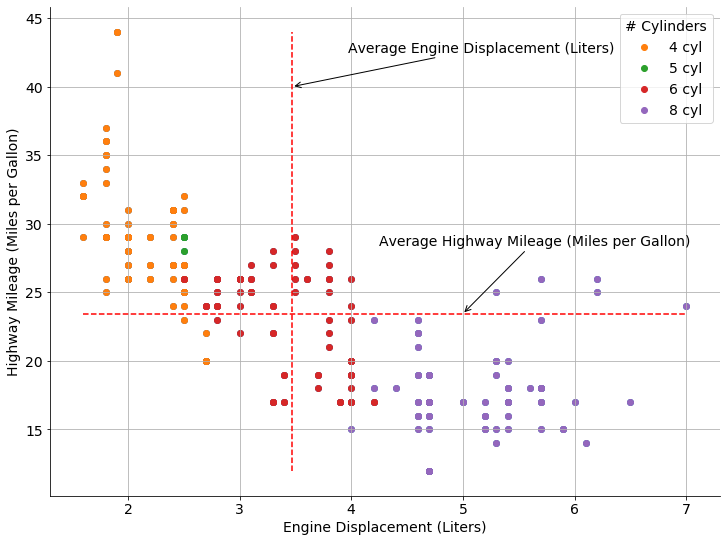

In [7]:
plt.scatter(x=x_vals, y=y_vals)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.hlines(y_vals.mean(), x_vals.min(), x_vals.max(), ls='--', color='red')
plt.vlines(x_vals.mean(), y_vals.min(), y_vals.max(), ls='--', color='red')

for c in c_uniq:
    subset = df[df.cyl == c]
    plt.scatter(subset.displ, subset.hwy, label = str(c) + ' cyl')
plt.legend(title = c_label)

plt.annotate(
    f'Average {x_label}',
    xy=(x_mean, 40),
    xytext=(x_mean+.5, 42.5),
    arrowprops={'arrowstyle': '->', 'color': 'black'}
)

plt.annotate(
    f'Average {y_label}',
    xy=(5, y_mean),
    xytext=(4.25, y_mean+5),
    arrowprops={'arrowstyle': '->', 'color': 'black'}
)


plt.show()

7. Instead of color, use seperate subplots to indicate the number of cylinders.

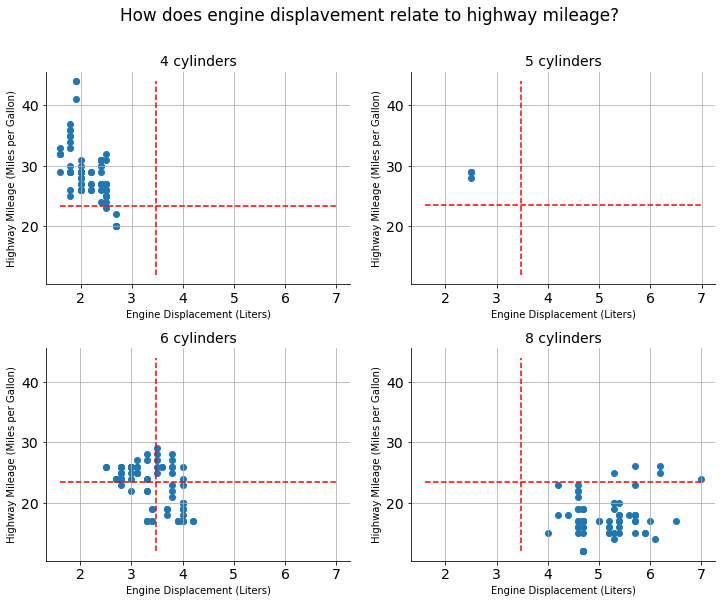

In [8]:
plt.scatter(x=x_vals, y=y_vals)

for i, cyl in enumerate(c_uniq):
    plt.subplot(2, 2, i+1)
    plt.title(f'{cyl} cylinders', size=14)
    
    
    
    subset = df[df.cyl == cyl]
    plt.scatter(subset.displ, subset.hwy)

    plt.xlabel(x_label, size=10)
    plt.ylabel(y_label, size=10)
    plt.hlines(y_vals.mean(), x_vals.min(), x_vals.max(), ls='--', color='red')
    plt.vlines(x_vals.mean(), y_vals.min(), y_vals.max(), ls='--', color='red')
    
    
    # plt.legend(title = c_label)

plt.subplots_adjust(hspace=.3)
plt.suptitle('How does engine displavement relate to highway mileage?')
plt.show()